# Hamidreza Aliakbary khoyi
###810196514

**Question 3**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import to_categorical
import tensorflow as tf

first we load data from library to work on.

In [29]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data, test_data =  train_data/255.0 ,test_data/255.0

In this library we are to build a neuural network that hase eithe dropout layer or not. it is obvious to just add desired layers to our model we sepcefic nodes and activation functions to work on.
Relu is ver good-working activation function in most cases because of simplicity of calculation and lessening of meaningful amount of time. this activation function performs good in most cases .

For drop out we should add a drop out layer that corrosponds to same nodes used in next layers. Dropout layer do prevent from stucking in local optimums. it is used to just try a way that if it is possible to get a better updates for any weights or biases.

as we have 10 feature so we let last Dense layer to have 10 nodes as output.

i use catogorical croos entropy as loss-function.
If we use this loss, we will train a CNN to output a probability over  classes for each image. It is used for multi-class classification.
also typically we use accuracy as a metric to evaluate our model.

In [3]:
model_Do = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(100, 'relu'),tf.keras.layers.Dropout(0.1), tf.keras.layers.Dense(100,'relu'), tf.keras.layers.Dense(10)])
model_NDo = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(100, 'relu'),tf.keras.layers.Dense(100, 'relu'), tf.keras.layers.Dense(10)])
print('--with Drop out----------------------------------------------------')
model_Do.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = 'accuracy')
history_Do = model_Do.fit(train_data, train_labels, epochs = 20 , validation_data = (test_data, test_labels))
print('\n \n--No Drop out------------------------------------------------------')
model_NDo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = 'accuracy')
history_NDo = model_NDo.fit(train_data, train_labels, epochs = 20 , validation_data = (test_data, test_labels))


--with Drop out----------------------------------------------------
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5120 - accuracy: 0.8157 - val_loss: 0.4383 - val_accuracy: 0.8391
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3892 - accuracy: 0.8577 - val_loss: 0.3824 - val_accuracy: 0.8579
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3549 - accuracy: 0.8687 - val_loss: 0.3694 - val_accuracy: 0.8668
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3345 - accuracy: 0.8761 - val_loss: 0.3701 - val_accuracy: 0.8687
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3176 - accuracy: 0.8820 - val_loss: 0.3775 - val_accuracy: 0.8668
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.8868 - val_loss: 0.3627 - val_accuracy: 0.8687
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step 

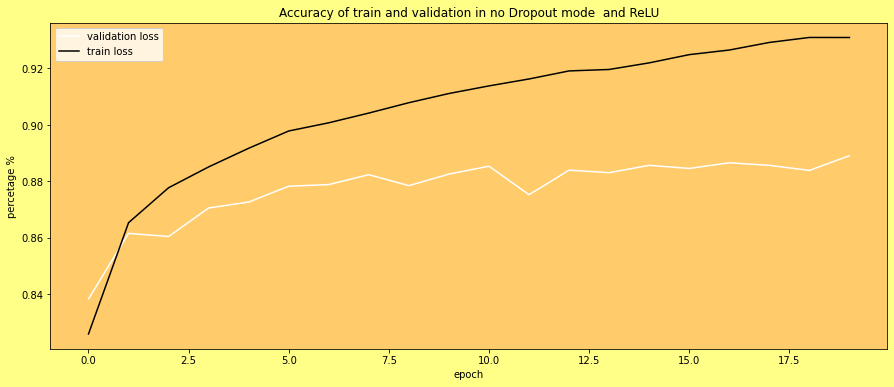

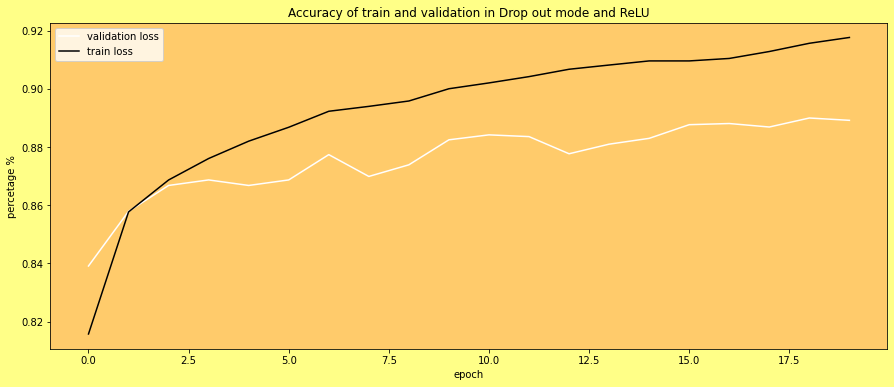

In [21]:
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('yellow')
fig.patch.set_alpha(0.47)
ax = fig.add_subplot(111)
ax.plot(history_NDo.history['val_accuracy'], color='white')
ax.plot(history_NDo.history['accuracy'], color='Black')
ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.2)
plt.title('Accuracy of train and validation in no Dropout mode  and ReLU')
plt.xlabel('epoch')
plt.ylabel('percetage %')
plt.legend(['validation loss','train loss'], loc='upper left')
plt.show()

fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('yellow')
fig.patch.set_alpha(0.47)
ax = fig.add_subplot(111)
ax.plot(history_Do.history['val_accuracy'], color='white')
ax.plot(history_Do.history['accuracy'], color='Black')
ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.2)
plt.title('Accuracy of train and validation in Drop out mode and ReLU')
plt.xlabel('epoch')
plt.ylabel('percetage %')
plt.legend(['validation loss','train loss'], loc='upper left')
plt.show()

after steps for learning in our model we can say that it is normal to have validation accuracy graph below the training data accuracy graph. because training data graph should be better because it examines data and sees data and try to fit itself to this specific data, But when a validation set comes in to just verify the borders set by training ususally it becomes lees than training. and evenif it is too close to training it means that validation data set acts like training data set and we can say that that validation is not good for representing as a validation data set.


In drop out mode as you can see in figures above , after using drop out mode it made model get to 88 percent of accuracy sooner that model with no dropout. 

In [4]:
def evaluate_built_model(model, data, labels): return model.evaluate(data, labels, verbose = 2)

In [30]:
print("With  No Dropout ...")
train_relu_loss, train_relu_accuracy = evaluate_built_model(model_NDo, test_data, test_labels)
print("With  Dropout ...")
test_relu_loss, test_relu_accuracy = evaluate_built_model(model_Do,test_data, test_labels)

With  No Dropout ...
313/313 - 0s - loss: 0.3622 - accuracy: 0.8891
With  Dropout ...
313/313 - 0s - loss: 0.3289 - accuracy: 0.8892


as we can see over all accuracy in drop out mode is slightly highr that no dropout mode , i didn't optimized neighter number of node nor dropout-rate, so it cloud be perform better when we just set a optimizer or some thing to it to just reach a better performance for each.

In [6]:
model_sigmoid = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(100, 'sigmoid'),tf.keras.layers.Dropout(0.1), tf.keras.layers.Dense(100,'sigmoid'), tf.keras.layers.Dense(10)])
model_sigmoid.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = 'accuracy')
history_sigmoid = model_sigmoid.fit(train_data, train_labels, epochs = 20 , validation_data = (test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6196 - accuracy: 0.7880 - val_loss: 0.4378 - val_accuracy: 0.8451
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4036 - accuracy: 0.8536 - val_loss: 0.4022 - val_accuracy: 0.8561
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3684 - accuracy: 0.8657 - val_loss: 0.3973 - val_accuracy: 0.8579
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3465 - accuracy: 0.8730 - val_loss: 0.3647 - val_accuracy: 0.8678
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3296 - accuracy: 0.8811 - val_loss: 0.3772 - val_accuracy: 0.8630
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3183 - accuracy: 0.8828 - val_loss: 0.3523 - val_accuracy: 0.8708
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3064 - accuracy: 0.8871 - val_loss: 0.3480 - val_accuracy:

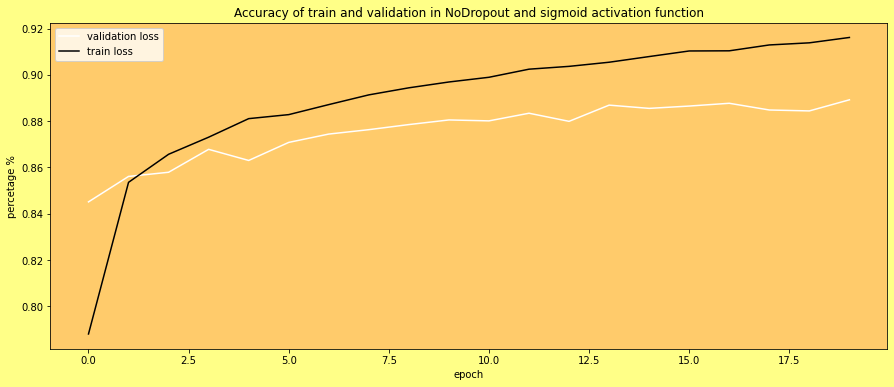

In [20]:
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('yellow')
fig.patch.set_alpha(0.47)
ax = fig.add_subplot(111)
ax.plot(history_sigmoid.history['val_accuracy'], color='white')
ax.plot(history_sigmoid.history['accuracy'], color='Black')
ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.2)
plt.title('Accuracy of train and validation in NoDropout and sigmoid activation function')
plt.xlabel('epoch')
plt.ylabel('percetage %')
plt.legend(['validation loss','train loss'], loc='upper left')
plt.show()

For sigmoidal activation function we can see that it performs like other activations, but there is no sigh on saturation and that is pretty good and that means data are not going to far from origin to det thair gradient vanish .

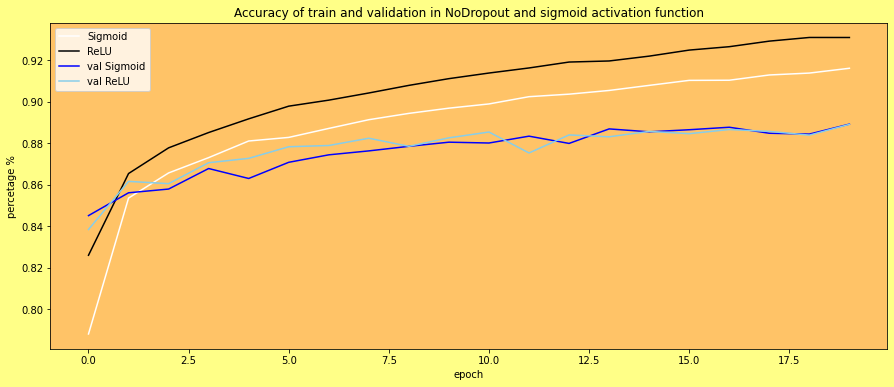

In [28]:
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('yellow')
fig.patch.set_alpha(0.47)
ax = fig.add_subplot(111)
ax.plot(history_sigmoid.history['accuracy'], color='white')
ax.plot(history_NDo.history['accuracy'], color='Black')
ax.plot(history_sigmoid.history['val_accuracy'], color='Blue')
ax.plot(history_NDo.history['val_accuracy'], color='SkyBlue')
ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.23)
plt.title('Accuracy of train and validation in NoDropout and sigmoid activation function')
plt.xlabel('epoch')
plt.ylabel('percetage %')
plt.legend(['Sigmoid','ReLU','val Sigmoid','val ReLU'], loc='upper left')
plt.show()

as we can see Relu peroforms better than sigmoid and that it is because of vanishing of slope of derivates of sigmoid when input is far from origin. but when we discuss on validation data both perform alittle same at the end.
